In [131]:
"""Ceci est un fichier de test contenant toutes les fonctions que je trouve pour débuter"""
#Importer les commandes utiles

import os
import os.path

from os import chdir

import sys, h5py, binascii
import numpy as np
import matplotlib.pyplot as plt
from pylab import * #Bibliothèque de fonctions qui ressemblent à matlab pour le calcul matriciel

from scipy.interpolate import griddata
from scipy.signal import medfilt2d, order_filter

#Définir les chemins qui nous interessent

path_SV="/home/chouze/Kriterres/Codes-Simon-Vedrine-2016"

path_CH="/home/chouze/Kriterres/TESTS_CLEM"

path_O="~/Codes/Porchet-new/TCHERNO/FORWARD_CLEM/SWMS_2D.OUT"

path_I="home/chouze/Codes/Porchet-new/TCHERNO/FORWARD_CLEM/SWMS_2D.IN/"

#Importer les fonctions créees par Simon Vedrine

chdir(path_SV)

from utils import *
from processing_tools import *

#Ouvrir un fichier de données de type ascii

chdir(path_CH)

data=open("example_radargram.dat")
contenu=data.read()
dx,dt = (0.00667, 0.008031) #Definition des pas de temps et pas d'espace
title="plot"

#Autre moyen pour ouvrir un fichier de type matrice
M=np.loadtxt('example_radargram.dat')
type(M) #Donne le type de variable
M=np.mat(M.T) #On prend la transposée de M colonnes=traces/lignes=data

#On commence par retirer la trace moyenne pour y voir plus clair
for n in range(0,l):
    moy_line=mean(M[n,:])
    M[n,:]=M[n,:]-moy_line
print(np.min(M))
print(np.max(M))

-93.7352195676
47.567250873


In [57]:
print(path_O) #Commande qui permet d'afficher une sortie, par exemple un résultat

a,b=8,3.5 #On peut affecter paralèllement plusieurs variables sur une seule ligne, séparé par des virgules
print(a)
type(b)#Dès qu'il trouve une virgule il considère le nombre comme un float

~/Codes/Porchet-new/TCHERNO/FORWARD_CLEM/SWMS_2D.OUT
8


float

In [112]:
M[2,2] #Ceci correspond à la valeur contenue en 2,2 dans M
l,c=shape(M) #Donne la taille de la matrice M
print(l)
print(c)
print(M[2,2])

3113
37
-0.00078124803258


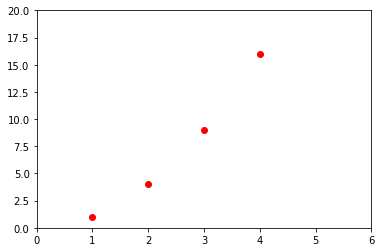

In [48]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro') #Exemple pour afficher un graphe de points rouges
plt.axis([0, 6, 0, 20]) #Donner les bornes du graphe
plt.show() #Demande d'afficher le graphique

In [30]:
M

array([[  0.00000000e+00,  -2.16818508e-03,  -7.81248033e-04, ...,
         -5.35320473e+00,  -4.91742659e+00,  -4.48644495e+00],
       [  0.00000000e+00,  -2.16818508e-03,  -7.81248033e-04, ...,
         -4.11582321e-01,  -1.58844680e-01,   8.07534829e-02],
       [  0.00000000e+00,  -2.16818508e-03,  -7.81248033e-04, ...,
          1.74482632e+00,   1.80088699e+00,   1.84540737e+00],
       ..., 
       [  0.00000000e+00,  -2.16818508e-03,  -7.81248033e-04, ...,
          1.49095941e+00,   1.48235476e+00,   1.46571434e+00],
       [  0.00000000e+00,  -2.16818508e-03,  -7.81248033e-04, ...,
          3.54501218e-01,   2.42831126e-01,   1.33029491e-01],
       [  0.00000000e+00,  -2.16818508e-03,  -7.81248033e-04, ...,
         -4.37180424e-04,  -5.52502577e-04,  -6.70919369e-04]])

In [103]:
T=[] #Une boucle pour créer un vecteur T contenant les temps
for i in range(0,l,1):#Attention de vérifier si l'on commencer à 0 ou à dt pour la première valeur
        T.append(i*dt)

In [95]:
type(dt)

float

In [76]:
read_ascii('example_radargram.dat')

ValueError: invalid literal for int() with base 10: '0.0000000000e+00'

In [79]:
T=np.zeros(l) #On crée une matrice de zéros de la taille de M

In [105]:
print(max(T)) #On peut afficher le max/min de T

24.992472


In [100]:
chdir(path_O)
read_ascii('')


FileNotFoundError: [Errno 2] No such file or directory: '~/Codes/Porchet-new/TCHERNO/FORWARD_CLEM/SWMS_2D.OUT'

In [110]:
type(M[2,2])

numpy.float64

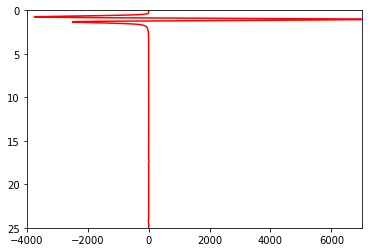

In [120]:
#plt.plot(M[:,5],T, 'r') #On trace une trace au pif pour voir si ça marche
#plt.axis([-4000, 7000, 25, 0]) #Donner les bornes du graphe
#plt.show()

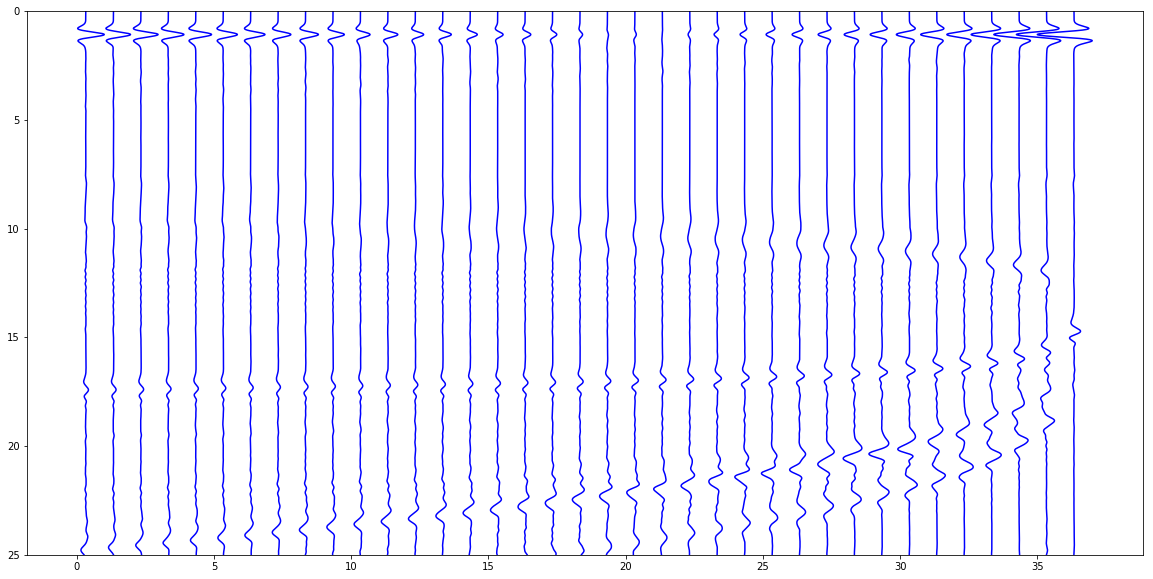

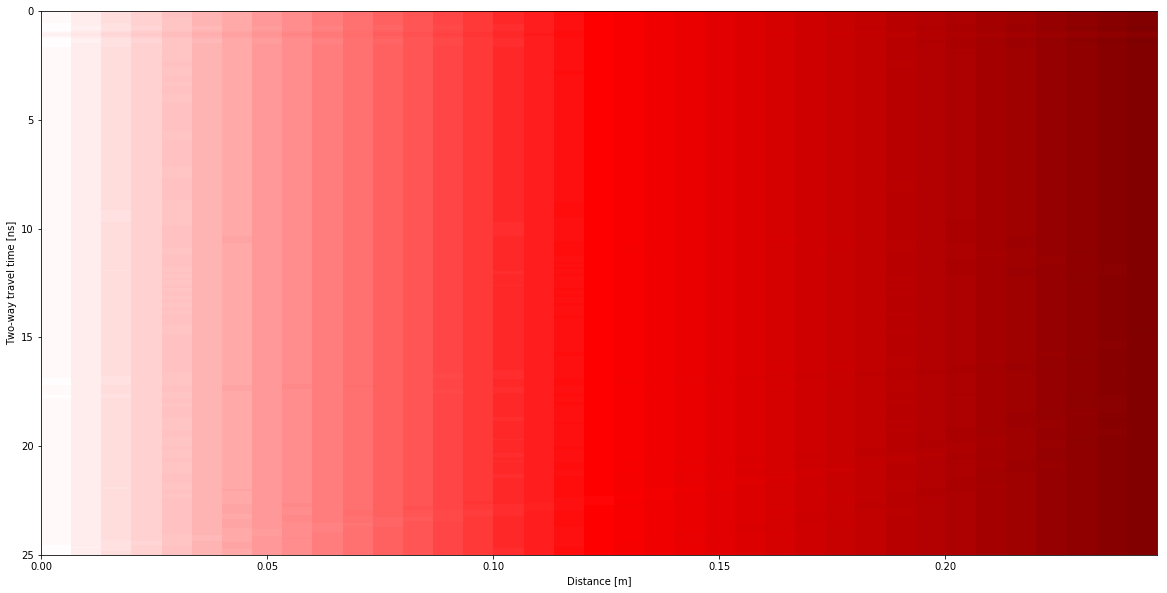

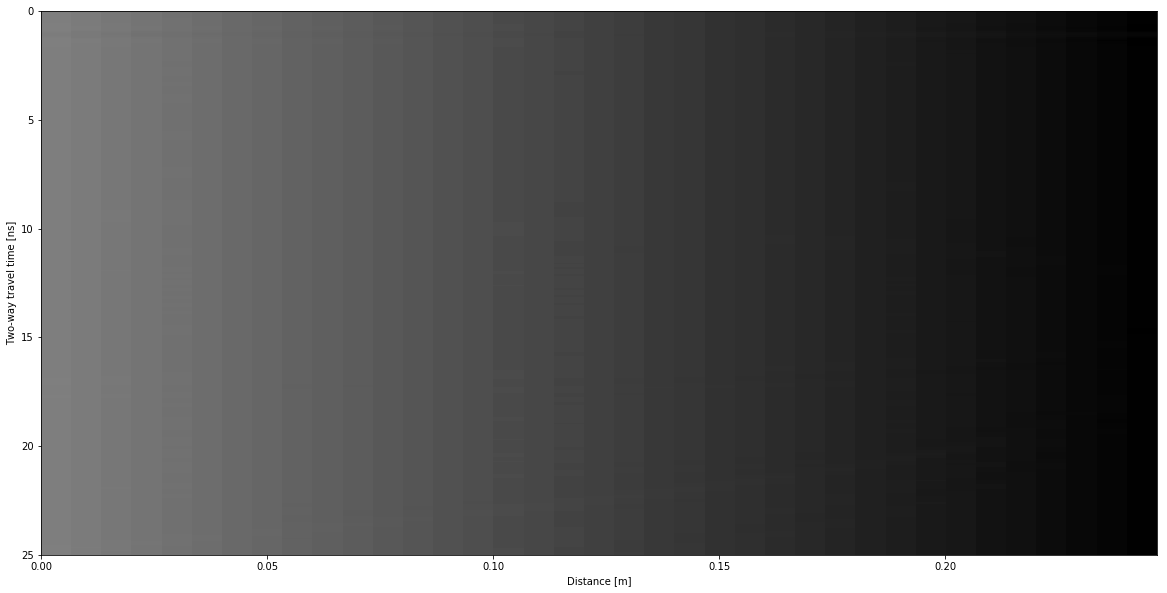

In [67]:
"""Ceci est un fichier de test contenant toutes les fonctions que je trouve pour débuter"""
#Importer les commandes utiles

import os
import os.path

from os import chdir

import sys, h5py, binascii
import numpy as np
import matplotlib.pyplot as plt
from pylab import * #Bibliothèque de fonctions qui ressemblent à matlab pour le calcul matriciel
from PIL import *

from scipy.interpolate import griddata
from scipy.signal import medfilt2d, order_filter

#Définir les chemins qui nous interessent

path_SV="/home/chouze/Kriterres/Codes-Simon-Vedrine-2016"

path_CH="/home/chouze/Kriterres/TESTS_CLEM"

path_O="~/Codes/Porchet-new/TCHERNO/FORWARD_CLEM/SWMS_2D.OUT"

path_I="home/chouze/Codes/Porchet-new/TCHERNO/FORWARD_CLEM/SWMS_2D.IN/"

#Importer les fonctions créees par Simon Vedrine

chdir(path_SV)

from utils import *
from processing_tools import *

#Ouvrir un fichier de données de type ascii

chdir(path_CH)

#data=open("example_radargram.dat")
#contenu=data.read()
#dx,dt = (0.00667, 0.008031) #Definition des pas de temps et pas d'espace
#title="plot"

#Autre moyen pour ouvrir un fichier de type matrice
M=np.loadtxt('example_radargram.dat')
type(M) #Donne le type de variable
M=np.mat(M.T) #On prend la transposée de M colonnes=traces/lignes=data

l,c=shape(M) #Donne la taille de la matrice M

dx_dt = [0.00667,0.008031] #Definition des pas de temps et pas d'espace

T=[] #Une boucle pour créer un vecteur T contenant les temps
for i in range(0,l,1):#Attention de vérifier si l'on commencer à 0 ou à dt pour la première valeur
        T.append(i*dt)

#On cherche à plotter le radargramme

#On commence par retirer la trace moyenne pour y voir plus clair
for n in range(0,l):
    moy_line=mean(M[n,:])
    M[n,:]=M[n,:]-moy_line
    
#Normaliser les traces pour que ça s'affiche mieux
for n in range(0,c):
#On calcule la moyenne, le minimum et le maximum de la matrice    
    meanM=np.mean(M)
    minM=np.min(M)
    maxM=np.max(M)
    M[:,n]=2*((M[:,n]-minM)/(maxM-minM))-1
    M[:,n]=M[:,n]+n
ylim(25,0)
#fig1=plt.figure(1)
plt.plot(M[:,:],T, 'b') #On trace une trace au pif pour voir si ça marche
#plt.axis([-1, 2, 25, 0]) #Donner les bornes du graphe
plt.show()

#On essaye de plotter le radargramme sous la forme d'une image

from PIL import Image

M_img=M
image = Image.fromarray(M_img)
#width, height = size(image)
#max_dim = max(size(image))
#factor = 1
#side = int(max_dim*factor)
#resized_image = image.resize((side, side), Image.ANTIALIAS)
#arr = np.asarray(image)
#plt.imshow(arr, cmap='gray')
r_image=image.resize((1000,1000))
#r_image.show()
plot_radargram(M,dx_dt,'Titre')

#Tests ci-dessous pour bricoler la fonction plot-radargram

def plot_radargram (data, dx_dt, title):
	
	""" Plot B-scan """
	
	dx, dt = dx_dt
	samples, traces = data.shape
	t = np.linspace(0, 1, samples) * (samples * dt)
	x = np.linspace(0, 1, traces) * (traces * dx)	
	
	fig = plt.figure(num=title, figsize=(20, 10), facecolor='w', edgecolor='w')
	plt.imshow(data, extent=[np.amin(x), np.amax(x), np.amax(t), np.amin(t)], interpolation='nearest', aspect='auto', cmap='binary', vmin=-np.amax(abs(data)), vmax=np.amax(abs(data)))
	plt.xlabel('Distance [m]')
	plt.ylabel('Two-way travel time [ns]')
	
	plt.show()

plot_radargram(M,dx_dt,'Titre')

In [10]:
Mm=np.mat(M)

In [129]:
type(Mm)

numpy.matrixlib.defmatrix.matrix

In [83]:
print(max.M)

AttributeError: 'builtin_function_or_method' object has no attribute 'M'

In [137]:
print(np.min(M))
print(np.max(M))
print(np.argmax(M))

0.0317472054485
37.0
6289


In [109]:
for n in range(0,l):
    moy_line=mean(M[n,:])
    M[n,:]=M[n,:]-moy_line
print(M[:,:])

[[-17.05405871 -16.38079021 -16.0447186  ...,  15.9552814   16.9552814
   17.9552814 ]
 [-17.05405871 -16.38079021 -16.0447186  ...,  15.9552814   16.9552814
   17.9552814 ]
 [-17.05405871 -16.38079021 -16.0447186  ...,  15.9552814   16.9552814
   17.9552814 ]
 ..., 
 [-16.51663969 -16.3981769  -16.04040137 ...,  15.95598009  16.93978138
   17.9347222 ]
 [-16.74124396 -16.39167771 -16.03332672 ...,  15.96213302  16.94446525
   17.94099614]
 [-16.95430479 -16.38550531 -16.02672599 ...,  15.96786199  16.94886633
   17.94696061]]


In [100]:
 moy_line=mean(M[100,:])
print(moy_line)

16.8187750133


In [59]:
M[100,:]=M[100,:]-moy_line
print(M[100,:])

[[-20.70481419 -19.13450169 -19.04075169 -17.46262669 -17.37668919
  -15.81418919 -15.72043919 -14.15793919 -14.05637669 -12.49387669
  -10.96262669 -10.84543919  -9.23606419  -9.11106419  -7.54075169
   -5.97825169  -5.90793919  -4.25950169  -2.70481419  -1.19700169
   -0.99387669   0.62331081   2.18581081   3.73268581   5.35768581
    6.96706081   8.55299831  10.18581081  11.79518581  13.37331081
   14.99831081  18.07643581  19.67799831  22.70924831  27.20143581
   31.67799831  37.58424831]]


In [113]:
print(shape(M))

(3113, 37)


In [24]:
print(max_dim)

3113


In [21]:
size(image)

(37, 3113)